# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
import scipy.stats as st 
import math



## Cargar datos

In [2]:
llamadas = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
mensajes = pd.read_csv('megaline_messages.csv')
tarifas = pd.read_csv('megaline_plans.csv')
usuarios = pd.read_csv('megaline_users.csv')



## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
tarifas.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
tarifas.head()



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Lo observado: el dato mb_per_month_included debe ser redondeado a Gigas, para que los datos estén de acuerdo a lo que el cliente usa, aquí el dato importante a saber es que para un gigabite se necesitan 1024 megabites, aquí no usaremos el sistema decimal para ser más precisos con la compañía.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
tarifas['gb_per_month_included'] = tarifas['mb_per_month_included'] /1024
tarifas['gb_per_month_included'] = tarifas['gb_per_month_included'].astype('int')
tarifas.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Enriquecer los datos

Por el momento no hay nada que agregar

## Usuarios/as

In [6]:
usuarios.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
usuarios.head(30)

# Imprime una muestra de datos para usuarios



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


Los datos de manera general están bien, el problema que se ve es solamente en la columna "churn_date" dado que hay muchos usuarios que no tendrán esta fecha dado que siguen usando el plan, suponiendo que el criterio es "tienen un plan contratado", este valor se podría reemplazar de ser necesario por un valor específico dependiendo de la necesidad de la operación que tengamos que hacer, por lo pronto lo que se me haría prudente es colocar una señal de modo "object" que declare "sigue con nosotros" usando las iniciales "PV" diciendo que tienen un plan vigente.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:
usuarios['churn_date'] = usuarios['churn_date'].fillna('pv')
usuarios.head(30)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,pv
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,pv
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,pv
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,pv
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,pv
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,pv
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,pv
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,pv
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,pv


### Enriquecer los datos

Por el momento los datos no requieren de ser enriquecidos, pero sí necesito hacer la observación que aunque en los datos dados en las instrucciones del proyecto dicen que la fecha está en formato (dd, mm, aa) el formato en realidad es (aaaa, mm, dd), y aunque podríamos cambiarlo para que sea de acuerdo a lo que tenemos no hace cambio significativo, por otro lado otros DF tienen fecha en el mismo formato y sería una perdida de tiempo cambiarlos todos manualmente, si yo estuviera en una situación donde el cliente lo quisiera necesariamente en el formato (dd, mm, aa) lo cambiaría únicamente en los resultados para que los DF en el análisis coincidan, pero en el resultado esté como el cliente lo pida. Por esta misma razón mantendré en todos los DF el formato (aaaa, mm, dd)

## Llamadas

In [9]:
llamadas.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:

llamadas.head(30)

# Imprime una muestra de datos para las llamadas



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Se dice que cada llamada individual se redondea, y en este caso se redondea para arriba, aunque dure un segundo la llamada se debe considerar como un minuto, lo que tenemos que hacer es colocar a los minutos como enteros redondeados, esto va a ayudar en congruencia con lo mencionado en las instrucciones y va a ayudar si se requiere graficar en un historiograma.

Por otro lado tenemos llamadas que no registran tiempo alguno, ya sea llamadas que se registraron al marcar por error, o llamadas que no registraron tiempo, esto debe ser considerado para quitarse de los datos dado que puede sesgar la grafica y no tenemos razon real de la falta de estos datos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [11]:
llamadas = llamadas[llamadas['duration'] > 0].copy()
llamadas['duration'] = llamadas['duration'].apply(math.ceil)
llamadas['duration'].astype('int')
llamadas.reset_index(drop=True, inplace=True)
average_duration = llamadas[llamadas['duration'] < 1000]['duration'].mean()
llamadas.loc[llamadas['duration'] > 1000, 'duration'] = average_duration
print(llamadas[llamadas['duration'] > 1000])


Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []


C:\Users\USER\AppData\Local\Temp\ipykernel_26564\113115078.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.875907340781417' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  llamadas.loc[llamadas['duration'] > 1000, 'duration'] = average_duration


### Enriquecer los datos

En este sentido se registraron aproximadamente 20 mil llamadas con el valor exacto de 0.00, pero quedó resuelto, las llamadas están redondeadas y tienen el valor inmediatamente superior a los decimales colocados, para más fácil análisis. no hay más cambios que realizar entendiendo que los datos en general están bien. Yo personalmente quise observar si información adicional a los dos usuarios que están arriba, usando el comando sample() y se ve que el Data Frame está bien.

Más adelante se pidieron datos de promedio y varianza, regrese para actualizar los datos entendidendo que los valores extremos estaban sesgando a la grafica y no daban el valor real de las cosas, así que las llamada únicas que superaran los 1000 minutos fueron eliminadas dado que había un usuario que estaba realizando muchas llamadas de 1510 minutos constantemente y ensuciaban los datos.

In [12]:
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110901 entries, 0 to 110900
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         110901 non-null  object 
 1   user_id    110901 non-null  int64  
 2   call_date  110901 non-null  object 
 3   duration   110901 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


## Mensajes

In [13]:
mensajes.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
mensajes.head(30)

# Imprime una muestra de datos para los mensajes



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


Aquí no hay mayor tema, la fecha sería lo más importante a revisar aquí si quisieramos hacer un historiograma, y como lo coloqué anteriormente conservaré el formato (aaaa, mm, dd) en todo caso estos datos sirven para un historiograma de frcuencia de mensajes en ciertas fechas, pero no creo que se observe una distribución normal ni una tendencia a que ciertos días se manden más mensajes, salvo días festivos, o días con desastres como un temblor, y tendría que ser la voluntad de nosotros analizar esos fenómenos, por lo que la grafica óptima no sería historiograma.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [15]:
#Nada que corregir

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [16]:
#Nada que aneccionar

## Internet

In [17]:
internet.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
internet.head(50)

# Imprime una muestra de datos para el tráfico de internet



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Tenemos el problema inicial de que el cliente espera que los datos usados estén en gb y no mb, así que haré lo mismo que con la columna anterior generando una nueva columna en la que se mantenga en gb pero no desperdiciando los valores de mb en caso de que se necesiten esos datos para un análisis más preciso.

Antes de hacer la columna de gb voy a liminar los valores 0 que no sabemos por qué se registran, así que los consideraremos como valores nulos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [19]:
internet = internet[internet['mb_used'] != 0]
internet['gb_used'] = internet['mb_used'] / 1024
internet['gb_used'] = internet['gb_used'].apply(math.ceil)
internet['gb_used'] = internet['gb_used'].astype('int')
internet.reset_index(drop=True, inplace=True)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91078 entries, 0 to 91077
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            91078 non-null  object 
 1   user_id       91078 non-null  int64  
 2   session_date  91078 non-null  object 
 3   mb_used       91078 non-null  float64
 4   gb_used       91078 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.5+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [20]:
tarifas.head()



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [21]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
llamadas['month'] = pd.to_datetime(llamadas['call_date']).dt.month
llamadas['calls_per_month'] = llamadas.groupby(['user_id', 'month'])['call_date'].transform('count')
calls_per_month = llamadas[['user_id', 'month', 'calls_per_month']].drop_duplicates().dropna()
calls_per_month['calls_per_month'] = calls_per_month['calls_per_month'].astype('int')
calls_per_month.reset_index(drop=True, inplace=True)
calls_per_month.head()


,user_id,month,calls_per_month
0,1000,12,16
1,1001,9,38
2,1001,10,47
3,1001,12,46
4,1001,11,49


In [22]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
llamadas['duration'] = llamadas.groupby(['user_id', 'month'])['duration'].transform('sum')
calls_duration_minutes = llamadas[['user_id', 'month', 'duration']].drop_duplicates().dropna()
calls_duration_minutes['duration'] = calls_duration_minutes['duration'].astype('int')
calls_duration_minutes.reset_index(drop=True, inplace=True)
calls_duration_minutes.head()


,user_id,month,duration
0,1000,12,124
1,1001,9,315
2,1001,10,393
3,1001,12,412
4,1001,11,426


In [23]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
mensajes['month'] = pd.to_datetime(mensajes['message_date']).dt.month
mensajes['messages_per_month'] = mensajes.groupby(['user_id', 'month'])['message_date'].transform('count')
messages_per_month = mensajes[['user_id', 'month', 'messages_per_month']].drop_duplicates().dropna()
messages_per_month['messages_per_month'] = messages_per_month['messages_per_month'].astype('int')
messages_per_month.reset_index(drop=True, inplace=True)
messages_per_month.head()


,user_id,month,messages_per_month
0,1000,12,11
1,1001,11,36
2,1001,8,30
3,1001,12,44
4,1001,10,53


In [24]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['month'] = pd.to_datetime(internet['session_date']).dt.month
internet['mb_used'] = internet.groupby(['user_id', 'month'])['mb_used'].transform('sum')
internet_traffic = internet[['user_id', 'month', 'mb_used']].drop_duplicates().dropna()
internet_traffic['gb_used'] = internet_traffic['mb_used'] / 1024
internet_traffic['gb_used'] = internet_traffic['gb_used'].apply(math.ceil)
internet_traffic['gb_used'] = internet_traffic['gb_used'].astype('int')
internet_traffic.reset_index(drop=True, inplace=True)
internet_traffic.head()


,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,12,19369.18,19
3,1001,11,18504.30,19
4,1001,10,22330.49,22


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [25]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

consumo_mensual_por_usuario = calls_per_month.merge(calls_duration_minutes, on=['user_id', 'month'], how='inner').merge(messages_per_month, on=['user_id', 'month'], how='inner').merge(internet_traffic, on=['user_id', 'month'], how='inner')
consumo_mensual_por_usuario.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             1758 non-null   int64  
 1   month               1758 non-null   int32  
 2   calls_per_month     1758 non-null   int64  
 3   duration            1758 non-null   int64  
 4   messages_per_month  1758 non-null   int64  
 5   mb_used             1758 non-null   float64
 6   gb_used             1758 non-null   int64  
dtypes: float64(1), int32(1), int64(5)
memory usage: 89.4 KB


In [26]:

usuarios_tarifas = pd.merge(usuarios, tarifas, left_on='plan', right_on='plan_name', how='left')
datos_completos = pd.merge(consumo_mensual_por_usuario, usuarios_tarifas, on='user_id', how='left')
datos_completos = datos_completos.drop(columns=['first_name', 'last_name', 'mb_per_month_included'])
datos_completos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                1758 non-null   int64  
 1   month                  1758 non-null   int32  
 2   calls_per_month        1758 non-null   int64  
 3   duration               1758 non-null   int64  
 4   messages_per_month     1758 non-null   int64  
 5   mb_used                1758 non-null   float64
 6   gb_used                1758 non-null   int64  
 7   age                    1758 non-null   int64  
 8   city                   1758 non-null   object 
 9   reg_date               1758 non-null   object 
 10  plan                   1758 non-null   object 
 11  churn_date             1758 non-null   object 
 12  messages_included      1758 non-null   int64  
 13  minutes_included       1758 non-null   int64  
 14  usd_monthly_pay        1758 non-null   int64  
 15  usd_

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [27]:
# Calcula el ingreso mensual para cada usuario

datos_completos['extra_minutes'] = (datos_completos['duration'] - datos_completos['minutes_included']).clip(lower=0)
datos_completos['extra_gb'] = (datos_completos['gb_used'] - datos_completos['gb_per_month_included']).clip(lower=0)
datos_completos['extra_messages'] = (datos_completos['messages_per_month'] - datos_completos['messages_included']).clip(lower=0)
datos_completos['total_income'] = datos_completos['usd_monthly_pay'] + (datos_completos['extra_minutes'] *datos_completos['usd_per_minute']) + (datos_completos['extra_gb'] * datos_completos['usd_per_gb']) + (datos_completos['extra_messages'] * datos_completos['usd_per_message'])
print(datos_completos.head(30))


    user_id  month  calls_per_month  duration  messages_per_month   mb_used  \
0      1000     12               16       124                  11   1901.47   
1      1001      9               38       315                  44  13314.82   
2      1001     10               47       393                  53  22330.49   
3      1001     12               46       412                  44  19369.18   
4      1001     11               49       426                  36  18504.30   
5      1001      8               22       182                  30   6919.15   
6      1002     11               48       386                  32  19345.08   
7      1002     12               38       384                  41  14396.24   
8      1002     10                8        59                  15   6552.01   
9      1003     12              118      1104                  50  27044.14   
10     1004     11               45       476                  25  21850.78   
11     1004      8               42       354       

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

C:\Users\USER\AppData\Local\Temp\ipykernel_26564\1621948529.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.875907340781417' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  datos_completos.loc[datos_completos['duration'] > 1000, 'duration'] = average_duration


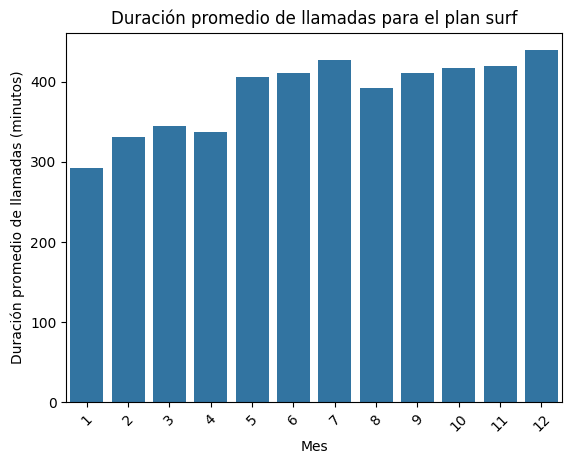

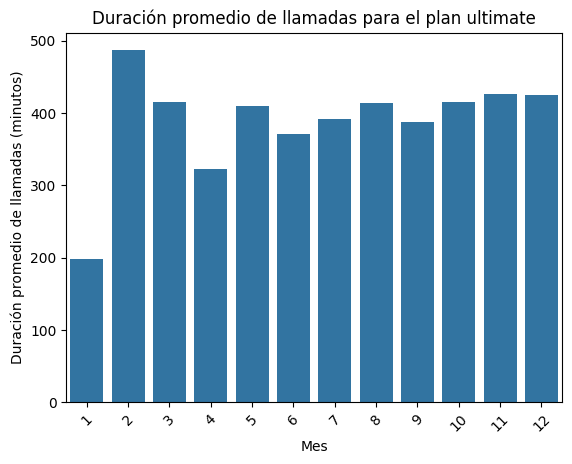

In [28]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
datos_completos = datos_completos[datos_completos['duration'] > 0].copy()
datos_completos['duration'] = datos_completos['duration'].apply(math.ceil)
datos_completos['duration'].astype('int')
datos_completos.reset_index(drop=True, inplace=True)
datos_completos.loc[datos_completos['duration'] > 1000, 'duration'] = average_duration
average_duration = datos_completos.groupby(['plan_name', 'month'])['duration'].mean().reset_index()
for plan in average_duration['plan_name'].unique():
    sns.barplot(data=average_duration[average_duration['plan_name'] == plan], x='month', y='duration')
    plt.title(f'Duración promedio de llamadas para el plan {plan}')
    plt.xlabel('Mes')
    plt.ylabel('Duración promedio de llamadas (minutos)')
    plt.xticks(rotation=45)
    plt.show()


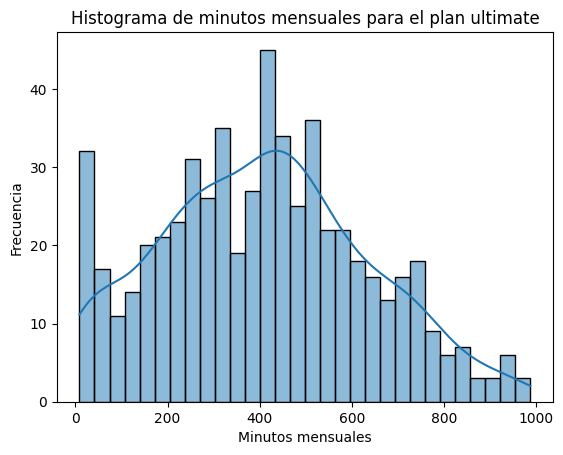

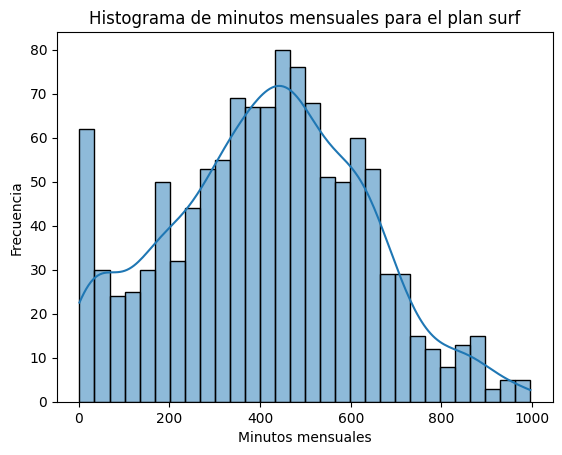

In [29]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.


plans = datos_completos['plan_name'].unique()
for plan in plans:
    sns.histplot(data=datos_completos[datos_completos['plan_name'] == plan], x='duration', bins=30, kde=True)
    plt.title(f'Histograma de minutos mensuales para el plan {plan}')
    plt.xlabel('Minutos mensuales')
    plt.ylabel('Frecuencia')
    plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [30]:
# Calcula la media y la varianza de la duración mensual de llamadas.    LE PEDI TAMBIEN LA DESVIACION ESTANDAR PARA PODER ENTENDER LOS DATOS MEJOR, LA VARIANZA SOLA ME PARECIA UN DATO EXTREMO QUE TENIA QUE ENTENDER EN CONTEXTO, ASI LA REGLA DE LOS TRES SIGMAS ME PODRIA AYUDAR A ENTENDER SI LOS VALORES ERAN LOS CORRECTOS.



mean_duration = datos_completos['duration'].mean()
var_duration = datos_completos['duration'].var()
std_duration = datos_completos['duration'].std()

stats_by_plan = datos_completos.groupby('plan_name')['duration'].agg(['mean', 'var', 'std']).reset_index()
stats_by_plan.columns = ['plan_name', 'mean_duration', 'var_duration', 'std_duration']

print(mean_duration)
print(var_duration)
print(std_duration)
print(stats_by_plan)


412.37012017882813
47920.97433786556
218.90859813599275
  plan_name  mean_duration  var_duration  std_duration
0      surf     414.760089  46729.067665    216.169072
1  ultimate     407.490945  50403.953142    224.508247


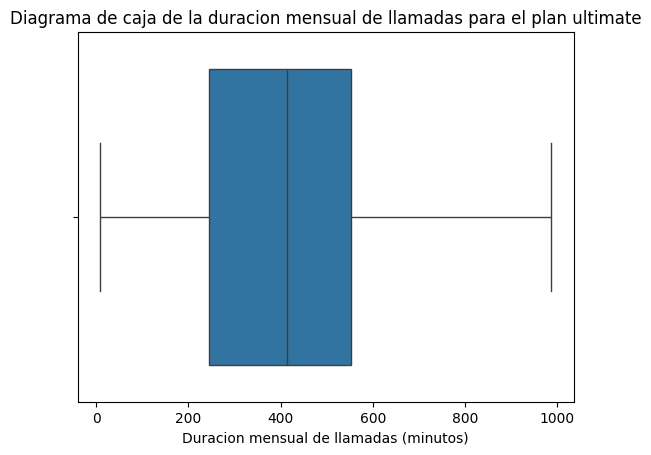

<Figure size 1000x600 with 0 Axes>

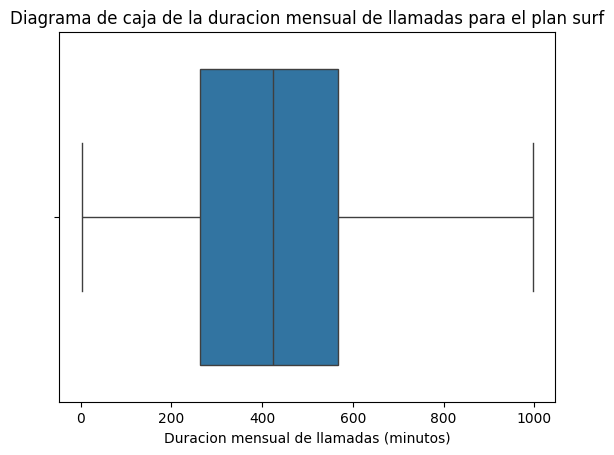

<Figure size 1000x600 with 0 Axes>

In [31]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas


for plan in datos_completos['plan_name'].unique():
    sns.boxplot(data=datos_completos[datos_completos['plan_name'] == plan], x='duration')
    plt.title(f'Diagrama de caja de la duracion mensual de llamadas para el plan {plan}')
    plt.xlabel('Duracion mensual de llamadas (minutos)')
    plt.figure(figsize=(10, 6))
    plt.show()


La mayoría de los minutos consumidos se estiman en el promedio arriba de 400 por mes en ambos planes, ninguno en promedio superando por mucho lo que incluye el plan surf o ultimate, pero, si quisieramos entender qué plan nos deja más, hay que pbservar que el plan ultimate nos está dando 3000 minutos, y ningún consumidor, aún con los datos extremos que llegaron a presentarse superaron los 3000 minutos al mes salvo un usuario en específico. 

Por otro lado podemos observar que en los historiogramas los comportamientos son semejantes, y lo que cambia esta en el extremos, que probablemente sea ahí donde la empresa gana, el problema con estos datos extremos es que sí representan una ganancia para la empresa, y es importante tomar en cuenta que aquí los datos extremos sí son de ayuda para entender qué plan nos da más rendimiento, podríamos tratar de eliminar algún dato extremos para hacerlo más relajado, pero el resultado serría el mismo, el plan Surf parece dar mucho más rendimiento, pero vamos a corroborar con el tema más adelante. 


### Mensajes

C:\Users\USER\AppData\Local\Temp\ipykernel_26564\531657517.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[47.92982456         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  datos_completos.loc[datos_completos['messages_per_month'] > 125, 'messages_per_month'] = average_messages


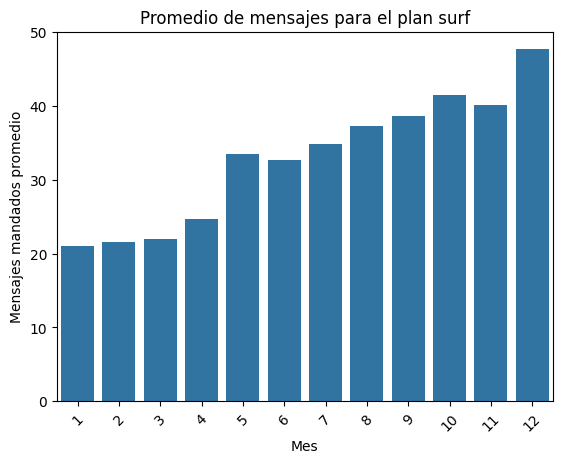

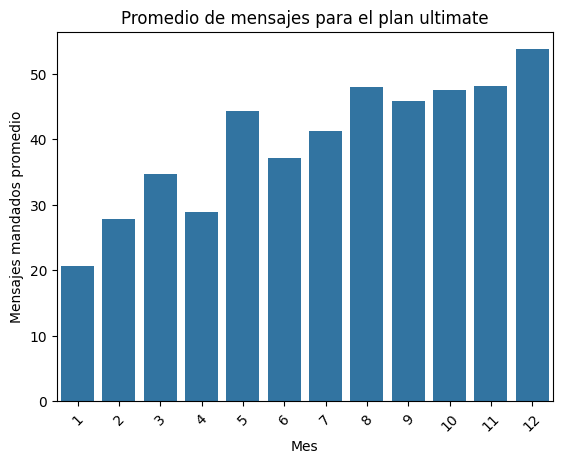

In [32]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
datos_completos = datos_completos[datos_completos['messages_per_month'] > 0].copy()
datos_completos['messages_per_month'] = datos_completos['messages_per_month'].apply(math.ceil)
datos_completos['messages_per_month'].astype('int')
datos_completos.reset_index(drop=True, inplace=True)
average_messages = datos_completos.groupby(['plan_name', 'month'])['messages_per_month'].mean().reset_index()
datos_completos.loc[datos_completos['messages_per_month'] > 125, 'messages_per_month'] = average_messages
for plan in average_messages['plan_name'].unique():
    sns.barplot(data=average_messages[average_messages['plan_name'] == plan], x='month', y='messages_per_month')
    plt.title(f'Promedio de mensajes para el plan {plan}')
    plt.xlabel('Mes')
    plt.ylabel('Mensajes mandados promedio')
    plt.xticks(rotation=45)
    plt.show()


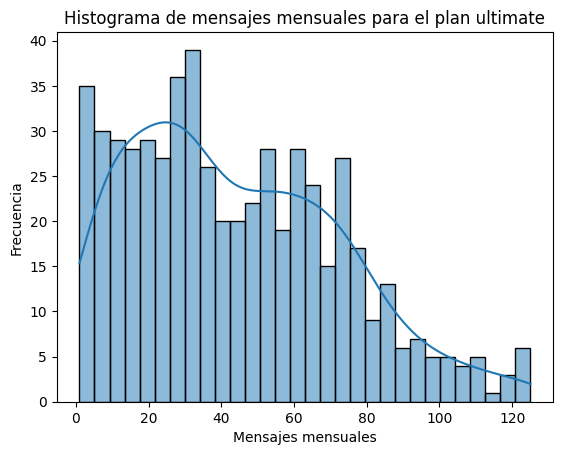

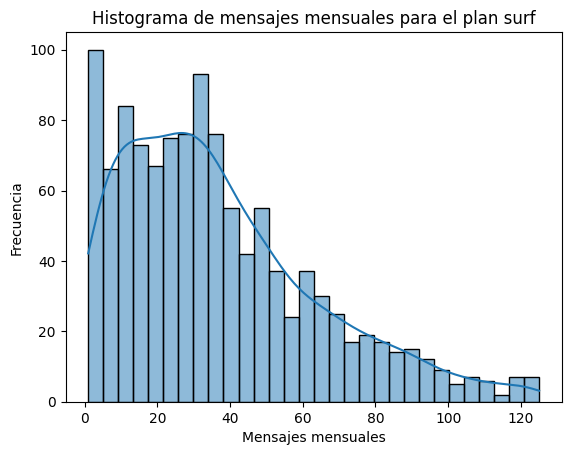

In [33]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
plans = datos_completos['plan_name'].unique()
for plan in plans:
    sns.histplot(data=datos_completos[datos_completos['plan_name'] == plan], x='messages_per_month', bins=30, kde=True)
    plt.title(f'Histograma de mensajes mensuales para el plan {plan}')
    plt.xlabel('Mensajes mensuales')
    plt.ylabel('Frecuencia')
    plt.show()


In [34]:
mean_messages_per_month = datos_completos['messages_per_month'].mean()
var_messages_per_month = datos_completos['messages_per_month'].var()
std_messages_per_month = datos_completos['messages_per_month'].std()

stats_by_plan_messages = datos_completos.groupby('plan_name')['messages_per_month'].agg(['mean', 'var', 'std']).reset_index()
stats_by_plan_messages.columns = ['plan_name', 'mean_messages_per_month', 'var_messages_per_month', 'std_messages_per_month']

print(mean_messages_per_month)
print(var_messages_per_month)
print(std_messages_per_month)
print(stats_by_plan_messages)

39.04952176359266
773.6461702987186
27.814495686578944
  plan_name  mean_messages_per_month  var_messages_per_month  \
0      surf                36.742188              730.255803   
1  ultimate                43.770746              830.645647   

   std_messages_per_month  
0               27.023246  
1               28.820924  


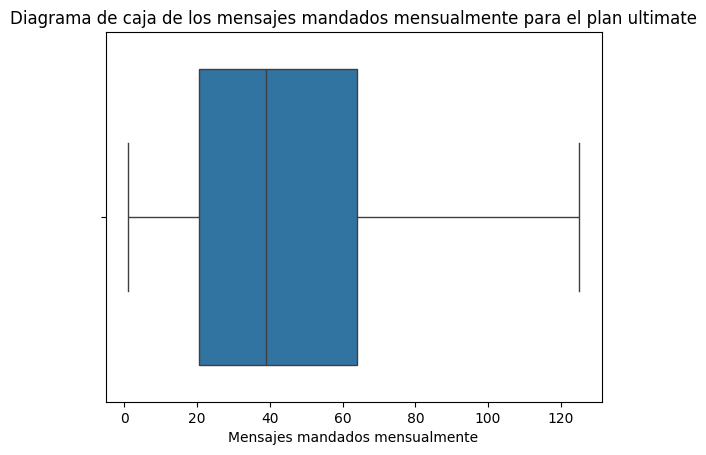

<Figure size 1000x600 with 0 Axes>

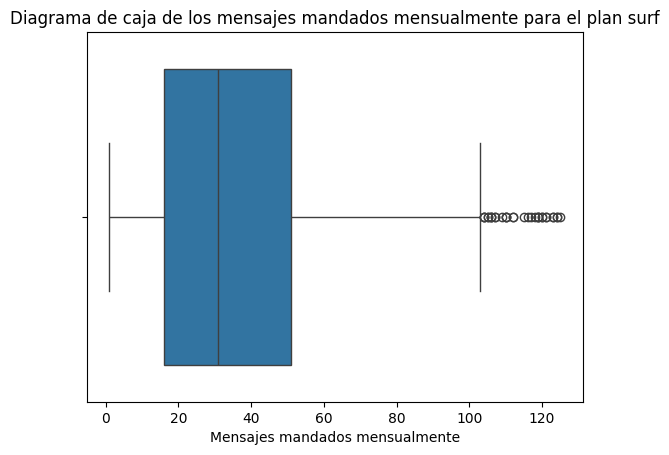

<Figure size 1000x600 with 0 Axes>

In [35]:
for plan in datos_completos['plan_name'].unique():
    sns.boxplot(data=datos_completos[datos_completos['plan_name'] == plan], x='messages_per_month')
    plt.title(f'Diagrama de caja de los mensajes mandados mensualmente para el plan {plan}')
    plt.xlabel('Mensajes mandados mensualmente')
    plt.figure(figsize=(10, 6))
    plt.show()

El sesgo es claro hacia la derecha, y en ambos casos podemos observar lo que tenemos en frente es un claro caso donde en el plan Surf parecen dar más rendimientos, y los datos extremos son más extremos, es curioso verlo de esta manera, los datos extremos nos ayudan a entender qué plan rinde un poco más, podríamos eliminarlos y encargarnos de analisarlo en terminos más reales, pero el resultado seguiría siendo el mismo, los mensjaes en Surf van a dar más rendimientos

### Internet

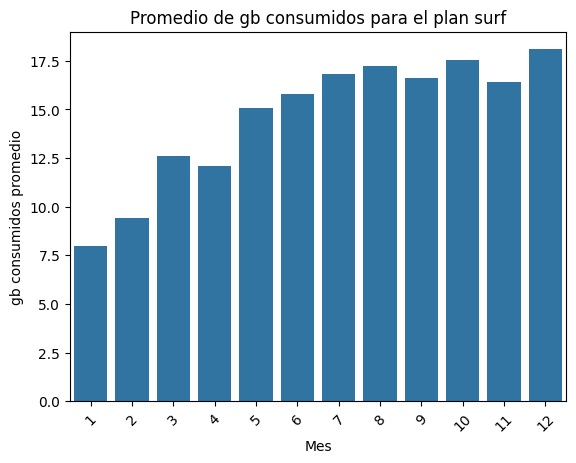

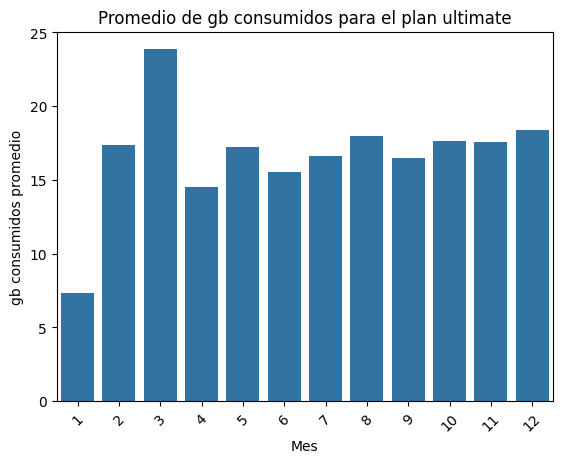

In [36]:
datos_completos = datos_completos[datos_completos['gb_used'] > 0].copy()
datos_completos['gb_used'] = datos_completos['gb_used'].apply(math.ceil)
datos_completos['gb_used'].astype('int')
datos_completos.reset_index(drop=True, inplace=True)
average_gb_used = datos_completos.groupby(['plan_name', 'month'])['gb_used'].mean().reset_index()
datos_completos.loc[datos_completos['gb_used'] > 35, 'gb_used'] = average_messages
for plan in average_gb_used['plan_name'].unique():
    sns.barplot(data=average_gb_used[average_gb_used['plan_name'] == plan], x='month', y='gb_used')
    plt.title(f'Promedio de gb consumidos para el plan {plan}')
    plt.xlabel('Mes')
    plt.ylabel('gb consumidos promedio')
    plt.xticks(rotation=45)
    plt.show()

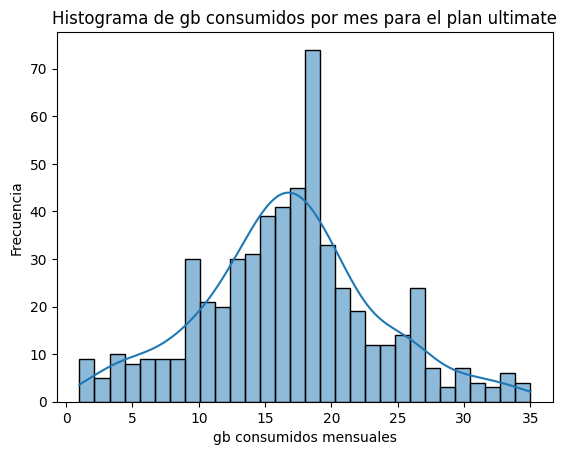

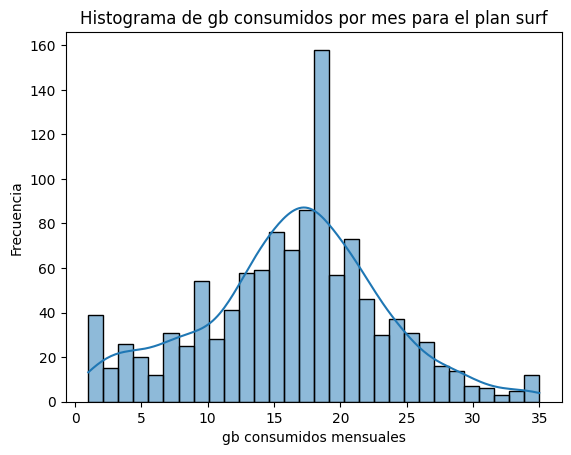

In [37]:
plans = datos_completos['plan_name'].unique()
for plan in plans:
    sns.histplot(data=datos_completos[datos_completos['plan_name'] == plan], x='gb_used', bins=30, kde=True)
    plt.title(f'Histograma de gb consumidos por mes para el plan {plan}')
    plt.xlabel('gb consumidos mensuales')
    plt.ylabel('Frecuencia')
    plt.show()

In [38]:
mean_gb_used = datos_completos['gb_used'].mean()
var_gb_used = datos_completos['gb_used'].var()
std_gb_used = datos_completos['gb_used'].std()

stats_by_plan_gb_used = datos_completos.groupby('plan_name')['gb_used'].agg(['mean', 'var', 'std']).reset_index()
stats_by_plan.columns = ['plan_name', 'mean_gb_used', 'var_gb_used', 'std_gb_used']

print(mean_gb_used)
print(var_gb_used)
print(std_gb_used)
print(stats_by_plan_gb_used)

16.48548199767712
46.289446281198096
6.803634784524967
  plan_name       mean        var       std
0      surf  16.350000  47.456342  6.888856
1  ultimate  16.765125  43.844913  6.621549


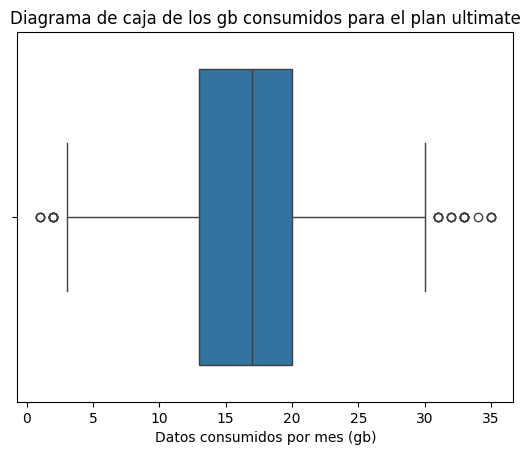

<Figure size 1000x600 with 0 Axes>

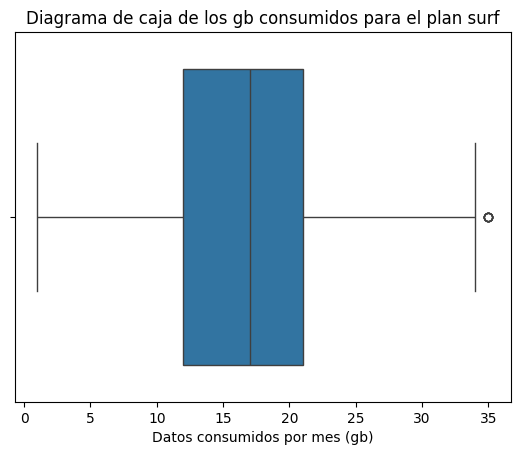

<Figure size 1000x600 with 0 Axes>

In [39]:
for plan in datos_completos['plan_name'].unique():
    sns.boxplot(data=datos_completos[datos_completos['plan_name'] == plan], x='gb_used')
    plt.title(f'Diagrama de caja de los gb consumidos para el plan {plan}')
    plt.xlabel('Datos consumidos por mes (gb)')
    plt.figure(figsize=(10, 6))
    plt.show()

Los promedios de consumo de GB están semejantes, pero podemos observar nuevamente que los datos extremos nos ayudan a entender la tendencia de lo que está pasando. El sesgo a la derecha nos ayuda a entender que en los datos de ultimate pocos superan los 30GB pero tenemos algunos que llegan hasta casi 50 de consumo, siendo que sí nos darán rendimiento de consumo extra pero que no son tan fuertes estos consumos.

En el dato de GB en Surf vemos que hay un dato extremo que consumió casi 70 GB pero es un solo dato, tenemos que la tendencia de comportamiento es semejante entre los 50 GB para abajo, dejando en claro que el plan Surf nos va a dar mucho rendimiento por exceso de consumo, ya que el promedio de usuarios consumen más de lo que su plan incluye

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

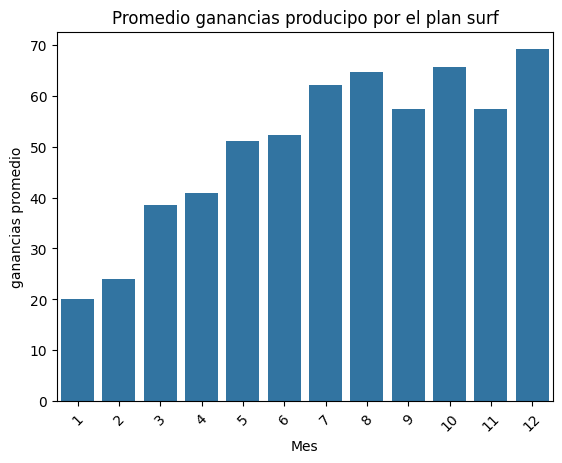

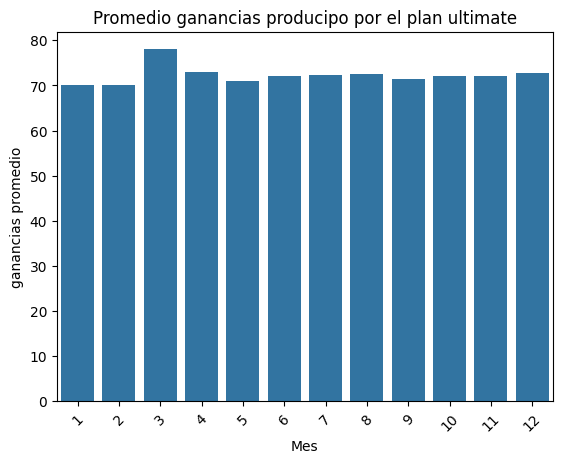

In [40]:
datos_completos = datos_completos[datos_completos['total_income'] > 0].copy()
datos_completos['total_income'] = datos_completos['total_income'].apply(math.ceil)
datos_completos['total_income'].astype('int')
datos_completos.reset_index(drop=True, inplace=True)
average_income = datos_completos.groupby(['plan_name', 'month'])['total_income'].mean().reset_index()
datos_completos.loc[datos_completos['total_income'] > 170, 'total_income'] = average_messages

for plan in average_income['plan_name'].unique():
    sns.barplot(data=average_income[average_income['plan_name'] == plan], x='month', y='total_income')
    plt.title(f'Promedio ganancias producipo por el plan {plan}')
    plt.xlabel('Mes')
    plt.ylabel('ganancias promedio')
    plt.xticks(rotation=45)
    plt.show()

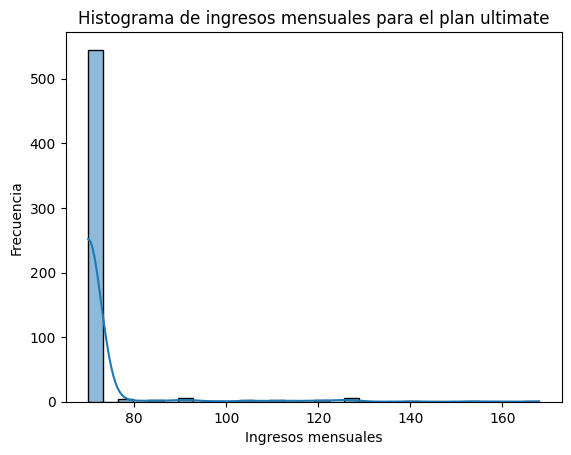

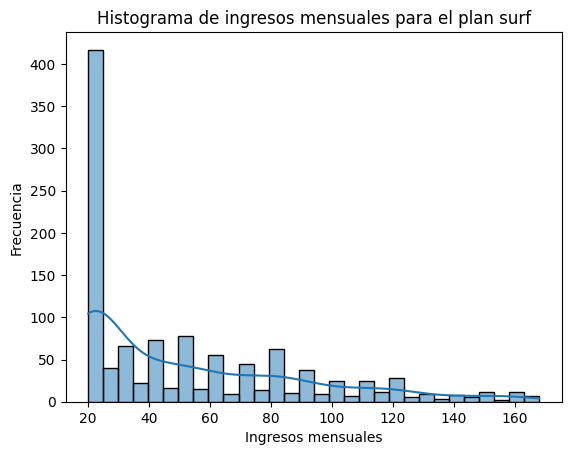

In [41]:
plans = datos_completos['plan_name'].unique()
for plan in plans:
    sns.histplot(data=datos_completos[datos_completos['plan_name'] == plan], x='total_income', bins=30, kde=True)
    plt.title(f'Histograma de ingresos mensuales para el plan {plan}')
    plt.xlabel('Ingresos mensuales')
    plt.ylabel('Frecuencia')
    plt.show()

In [42]:
mean_total_income = datos_completos['total_income'].mean()
var_total_income = datos_completos['total_income'].var()
std_total_income = datos_completos['total_income'].std()

stats_by_plan_total_income = datos_completos.groupby('plan_name')['total_income'].agg(['mean', 'var', 'std']).reset_index()
stats_by_plan.columns = ['plan_name', 'mean_total_income', 'var_total_income', 'std_total_income']

print(mean_total_income)
print(var_total_income)
print(std_total_income)
print(stats_by_plan_total_income)

59.19847328244275
1040.8971304527229
32.26293741203244
  plan_name       mean          var        std
0      surf  52.606572  1394.569521  37.343936
1  ultimate  72.062392   101.225267  10.061077


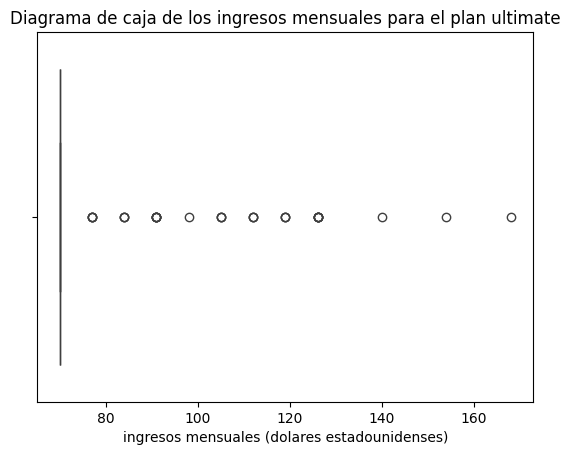

<Figure size 1000x600 with 0 Axes>

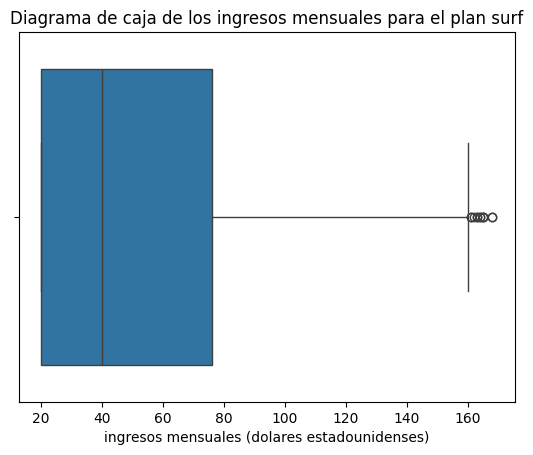

<Figure size 1000x600 with 0 Axes>

In [43]:
for plan in datos_completos['plan_name'].unique():
    sns.boxplot(data=datos_completos[datos_completos['plan_name'] == plan], x='total_income')
    plt.title(f'Diagrama de caja de los ingresos mensuales para el plan {plan}')
    plt.xlabel('ingresos mensuales (dolares estadounidenses)')
    plt.figure(figsize=(10, 6))
    plt.show()

Aquí podemos observar directamente en el comprotamiento de los ingresos que en realidad lo que está generando más entrada en promedio es el plan ultimate, que da 72 dólares, aunque el que genera más entrada extraordinaria es el plan Surf, siendo que el plan solo cuesta 20 dólares vemos que el promedio de ingreso está por los 64, que a muchos usuarios les convendría usar el plan ultimate, pero a la empresa tal vez no le convendría que los que se excedan demasiado lo usen si lo único que importa es la entrada de dinero, sin embargo, si quieren que el promedio de ingreso suba pueden observar qué clientes son aptos para usar el plan ultimate, aquellos que se acerquen a la cifra de 70 dólares y su consumo entre dentro de los parametros para que se les haga esta promoción, sería ideal como plan de venta, y así ganar un poco más.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

H₀. Los ingresos promedio de los usuarios de los planes Ultimate y Surf son iguales
H₁. Los ingresos promedio de los usuarios de los planes Ultimate y Surf no son iguales
alpha = 0.05

In [44]:
# Prueba las hipótesis
ingresos_surf = datos_completos[datos_completos['plan_name'] == 'surf'].groupby('month')['total_income'].sum().reset_index()
ingresos_ultimate = datos_completos[datos_completos['plan_name'] == 'ultimate'].groupby('month')['total_income'].sum().reset_index()
results = st.ttest_ind(ingresos_surf['total_income'], ingresos_ultimate['total_income'], equal_var=False)
print(f'valor p: {results.pvalue}')
alpha = 0.05
if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')



valor p: 0.3620790184012298
No podemos rechazar la hipotesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]
H₀. Los ingresos promedio de los usuarios de NY-NJ son iguales a los de las otras regiones
H₁. Los ingresos promedio de los usuarios de NY-NJ no son iguales a los de las otras regiones
alpha = 0.05

New York-Newark-Jersey City, NY-NJ-PA MSA

In [45]:
# Prueba las hipótesis
alpaha = 0.05
ingresos_ny_nj = datos_completos[datos_completos['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_income']
ingresos_otros = datos_completos[datos_completos['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_income']
result = st.ttest_ind(ingresos_ny_nj, ingresos_otros, equal_var=False)
print(f'valor p: {results.pvalue}')
if result.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')

valor p: 0.3620790184012298
No podemos rechazar la hipotesis nula


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

1.- el plan con más rendimiento: Podemos ver que aunque estadísticamente con un alpha de 0.05% se considere que no hay mucha diferencia en los ingresos de los usuarios entre Surf y ultimate basados en la muestra que tuvismo, sí podemos observar que los datos extremos nos dieron información importante en cada uno de los consumos principales, dado que podemos ver que los usuarios de Surf tienden a ser más extremos en el uso de su contenido, y los usuarios de ultimate por lo general entran dentro de los parametros dados por el plan sin mayor caso demasiado extremo.

2.- La recomendacion que yo daría: Yo recomendaría a la empresa evaluar los usuarios que están gastando alrrededor de 60 a 68 dólares de las cuentas Surf entendiendo que son usuarios que les alcanza para el ultimate y ayudará a empuajr un poco los ingresos a los 70 promedio, y dejaría en paz a los usuarios extremos salvo que ellos lo requieran dado que dan entrada extra sin mayor esfuerzo y no parece interesarles tampoco una manera de ahorrar o conseguir más datos para los patrones de consumo que tienen

3.- La situación de gasto regional: Sípodemos observar que hay una diferencia de consumo según la región en la que perteneces, esto se debe a diferentes factores que pueden ser evaluados, como el ingreso promedio o los datos que se usan por trabajo, etc. en este caso no es sorpresiva la conclusión, y valdría la pena colocar estaa información a los ojos de la empresa para que vea que en la regiones más urbanizadas hay oportunidad de crecimiento si es que la competencia no tiene un mercado afianzado y la inversión no se va a desperdiciar ahí.

4.- Los datos extremos como ayuda de análisis general en este caso particular: Estaba inclinandome por no eliminar los datos extremos de las bases de datos, pero fue bnueno que lo hiciera, dio oportunidad a revisar que sí ah una diferencia importante entre los valores cuando se eliminan los datos extremos y cuando no, y es que los valores extremos beneficiaban extremadamente mucho a la entrada de dinero del plan Surf, pero no es prudente que se considere.

5.- Los ingresos son diferentes por plan: Sabiendo que no podemos rechazar la hipótesis nula los promedios son suficientemente diferentes para revisar nuevamente lo que podríamos hacer para que el ingreso mejore, de ahí mi consejo.